<a href="https://colab.research.google.com/github/heikkimikkonen/DAO/blob/main/Final_Work_Mikkonen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 26.4 MB/s eta 0:00:00


In [4]:
from faker import Faker
import pandas as pd
import random
from datetime import datetime

# Initialize Faker
fake = Faker()

# List of car models
car_models = ['Model S', 'Model 3', 'Model X', 'Model Y', 'Cybertruck']

# Create empty list to hold data
data = []

# Function to generate net revenue
def generate_net_revenue():
    if random.random() < 0.05:  # 5% chance of being an outlier
        return random.randint(10000, 50000)
    else:
        return random.randint(100, 10000)

# Generate data
for _ in range(100):
    name = fake.name()
    city = fake.city()
    country = fake.country()
    sex = random.choice(['Male', 'Female'])
    age = random.randint(18, 80)

    num_products = random.randint(1, len(car_models))
    products_reviewed = random.sample(car_models, num_products)

    for product in products_reviewed:
        feedback = fake.text(max_nb_chars=200)
        net_revenue = generate_net_revenue()
        date = fake.date_this_decade(before_today=True, after_today=False)

        data.append({
            'Name': name,
            'City': city,
            'Country': country,
            'Sex': sex,
            'Age': age,
            'Product': product,
            'Feedback': feedback,
            'NetRevenue': net_revenue,
            'Date': date
        })

# Create DataFrame
df = pd.DataFrame(data)

# Save to Excel
df.to_excel('feedback_with_random_products.xlsx', index=False)

print('Data generated and saved to feedback_with_random_products.xlsx')


Data generated and saved to feedback_with_random_products.xlsx


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [6]:
import pandas as pd

df = pd.read_excel('/content/feedback_with_random_products.xlsx')
print(df.head())


              Name            City                        Country   Sex  Age  \
0  Patrick Johnson  Williamchester                        Senegal  Male   52   
1  Patrick Johnson  Williamchester                        Senegal  Male   52   
2   Monica Salinas     Robertsberg  Holy See (Vatican City State)  Male   43   
3   Monica Salinas     Robertsberg  Holy See (Vatican City State)  Male   43   
4    Steven Barnes      Murphystad           United Arab Emirates  Male   19   

      Product                                           Feedback  NetRevenue  \
0     Model Y  Eight whether change detail whom happen. Natio...        9658   
1     Model X  Instead education natural each particularly. P...        3849   
2  Cybertruck  Try economic service while. Production station...        8533   
3     Model S  Dream pass large one avoid offer. Focus boy fr...         876   
4     Model 3  By buy month machine need of. Other rest every...        2358   

        Date  
0 2022-10-05  
1 2020-0

In [7]:
print(df.describe(include='all'))

                    Name       City Country     Sex         Age  Product  \
count                327        327     327     327  327.000000      327   
unique               100         99      81       2         NaN        5   
top     Jessica Chandler  East Sean  Taiwan  Female         NaN  Model X   
freq                   5          5      10     165         NaN       72   
mean                 NaN        NaN     NaN     NaN   48.522936      NaN   
min                  NaN        NaN     NaN     NaN   18.000000      NaN   
25%                  NaN        NaN     NaN     NaN   31.000000      NaN   
50%                  NaN        NaN     NaN     NaN   48.000000      NaN   
75%                  NaN        NaN     NaN     NaN   66.500000      NaN   
max                  NaN        NaN     NaN     NaN   80.000000      NaN   
std                  NaN        NaN     NaN     NaN   19.369160      NaN   

                                                 Feedback    NetRevenue  \
count       

In [9]:
import pandas as pd

df = pd.read_excel('/content/Final_work_Mikkonen.xlsx', sheet_name='Raw data')

In [11]:
!pip install openpyxl


In [17]:

import pandas as pd

df2 = pd.read_excel('/content/Final_work_Mikkonen.xlsx', sheet_name='Raw data')


descriptive_df = df2.describe(include='all')

with pd.ExcelWriter('Final_work_Mikkonen.xlsx', mode ='a', engine='openpyxl') as writer:
    descriptive_df.to_excel(writer, sheet_name='Descriptive Stats')

                                             |          | [  0%]   00:00 -> (? left)

Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



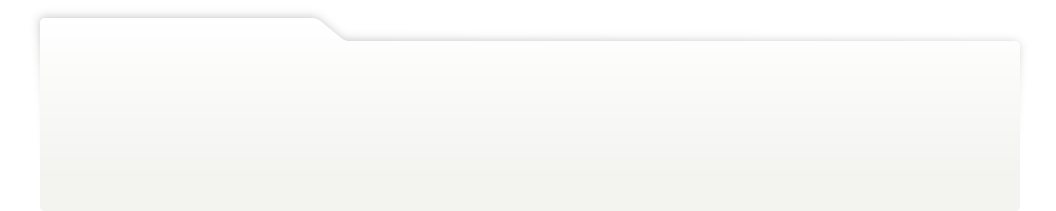
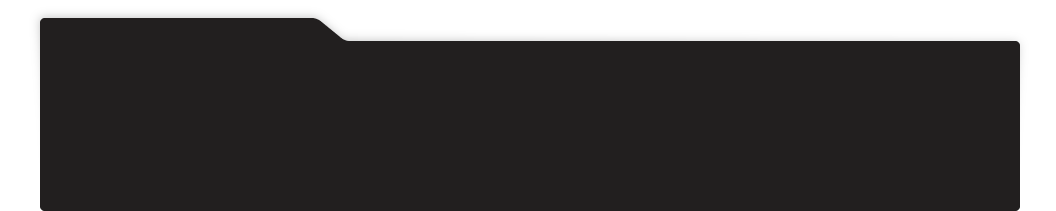
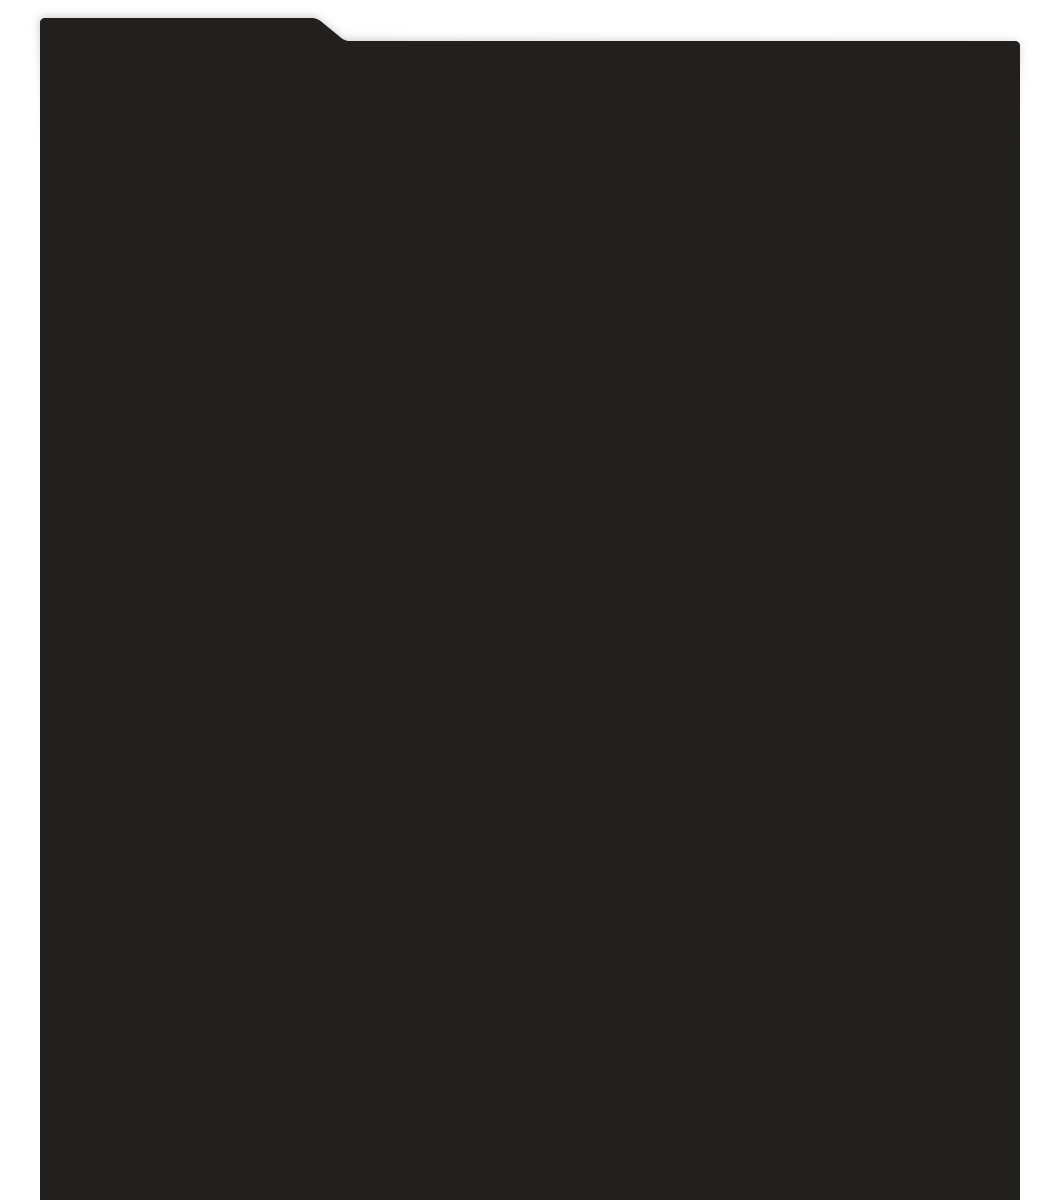
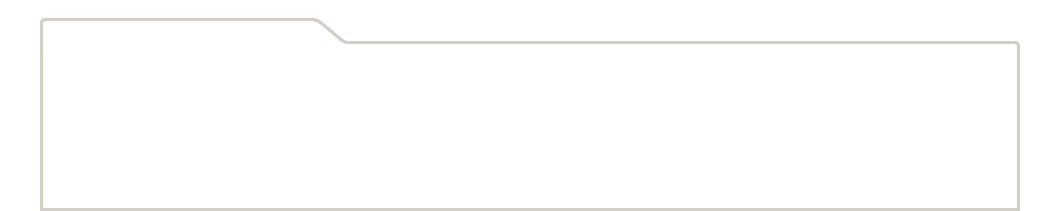
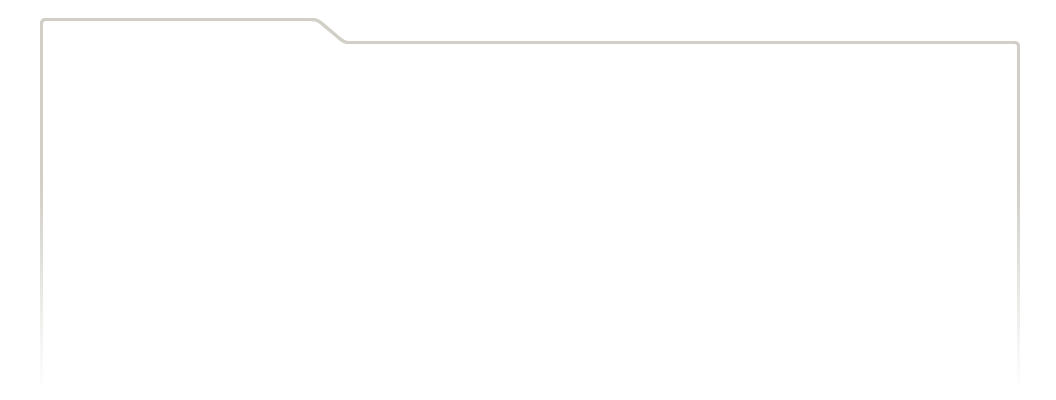
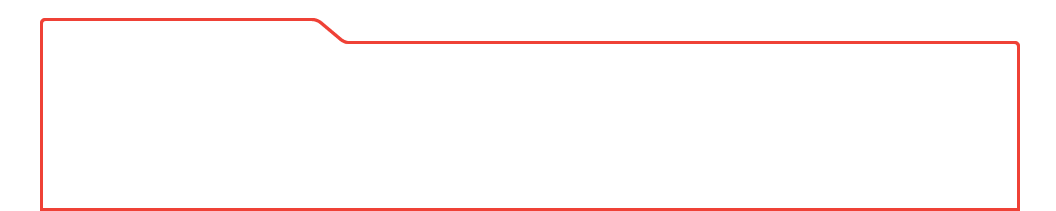
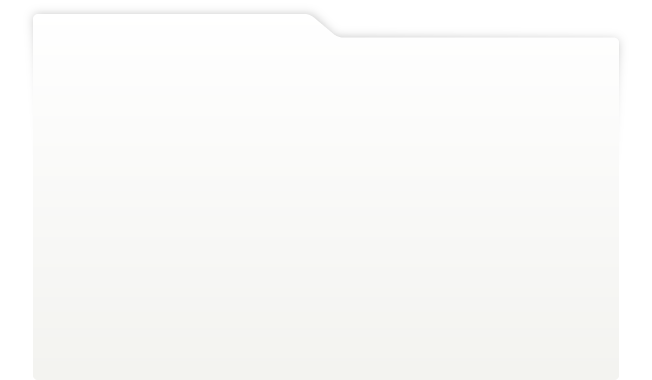
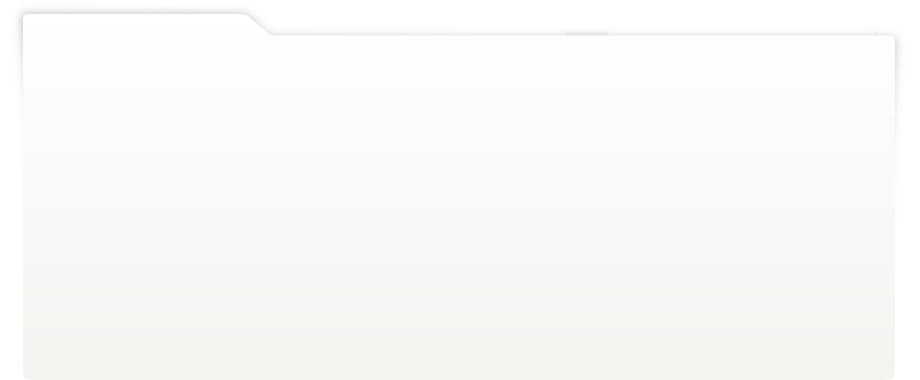
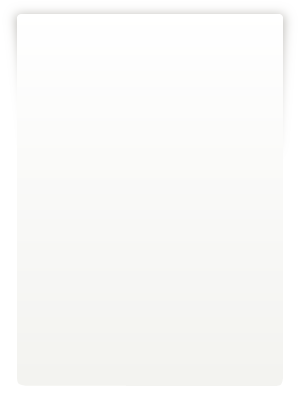
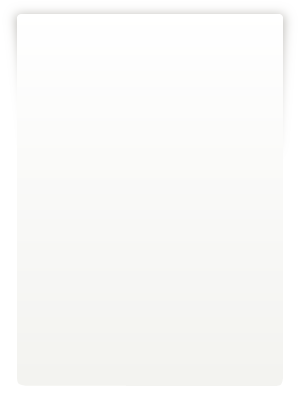
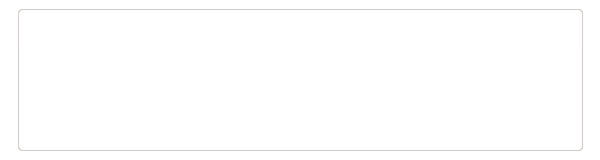
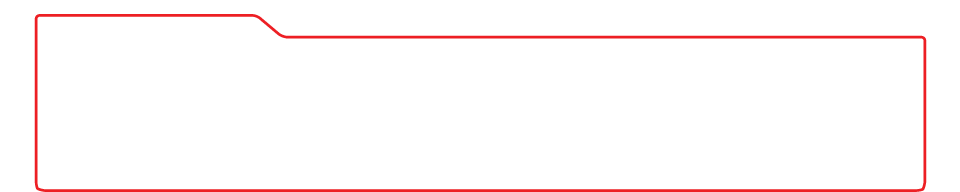
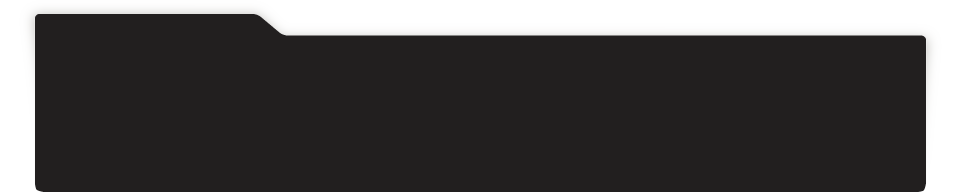
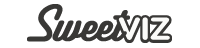
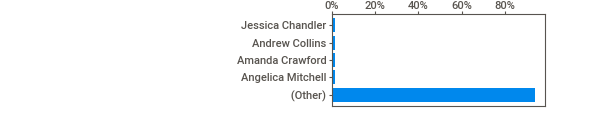
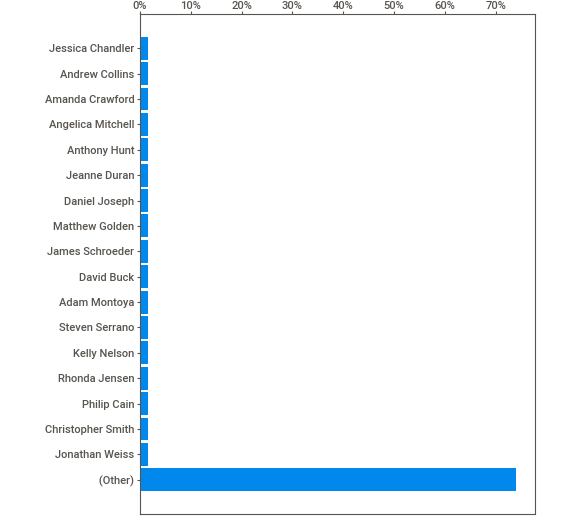
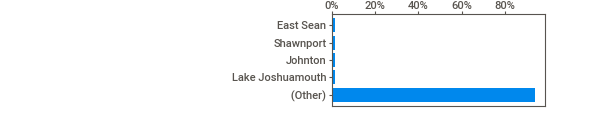
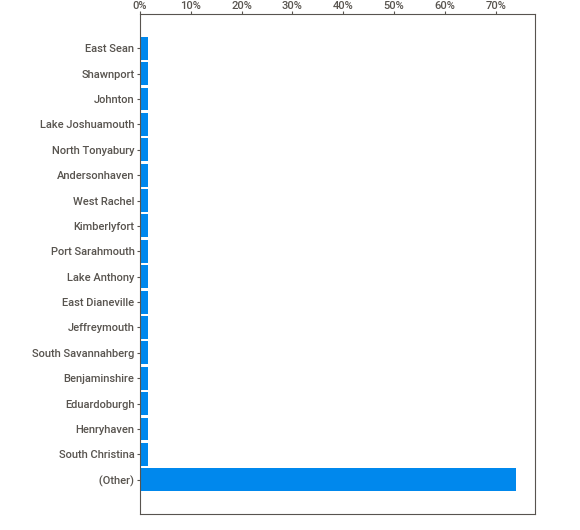
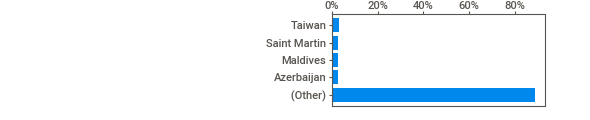
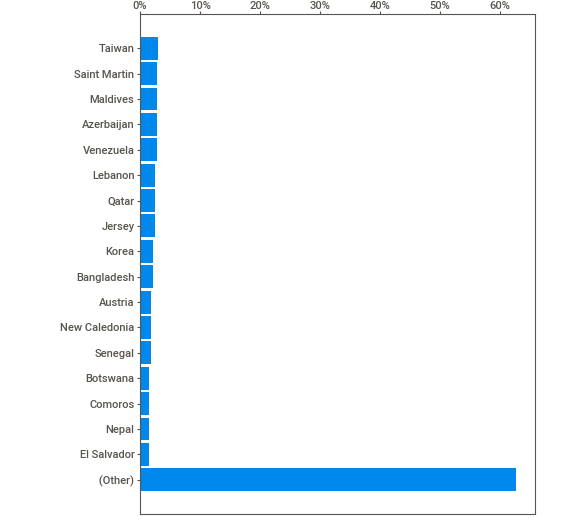
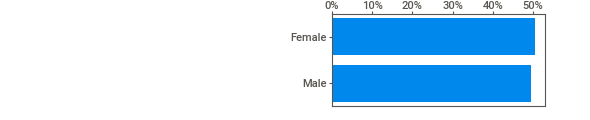
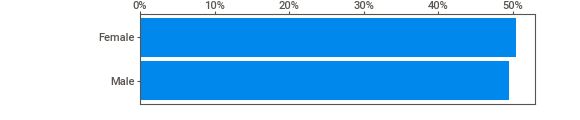
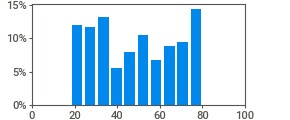
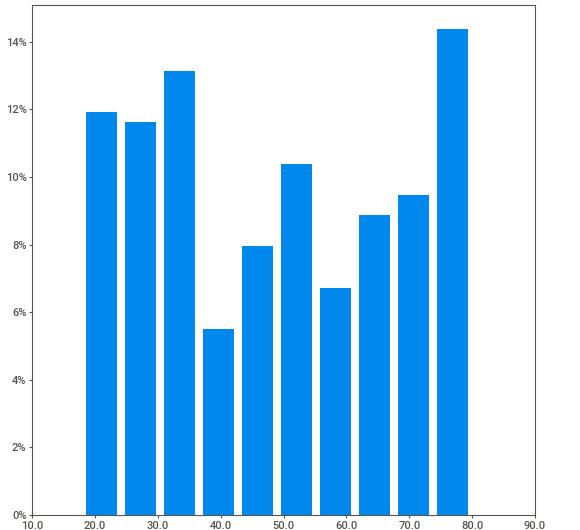
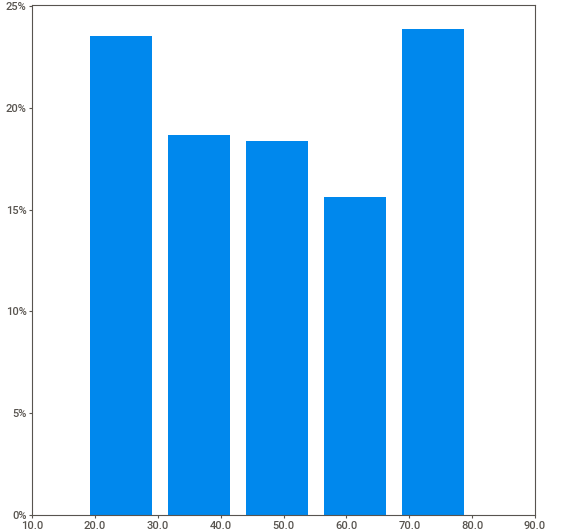
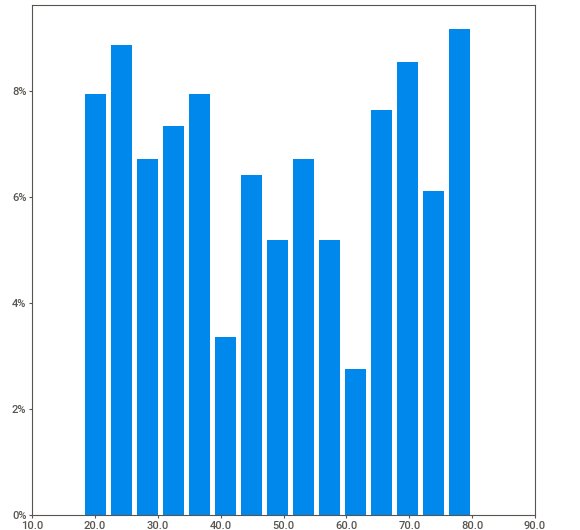
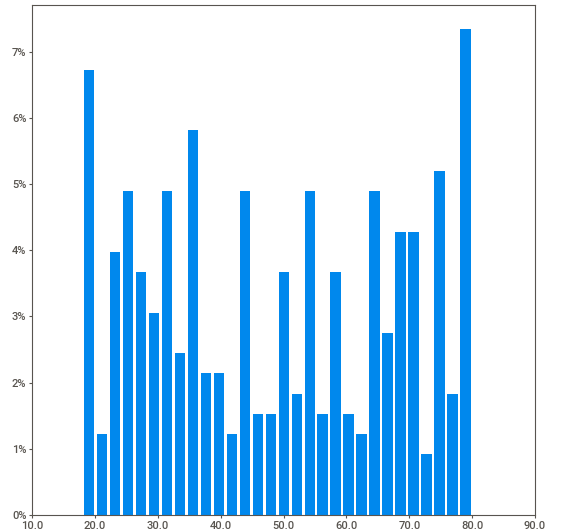
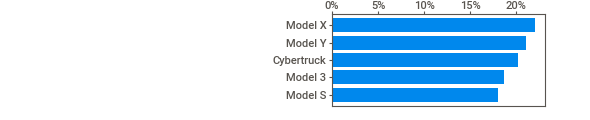
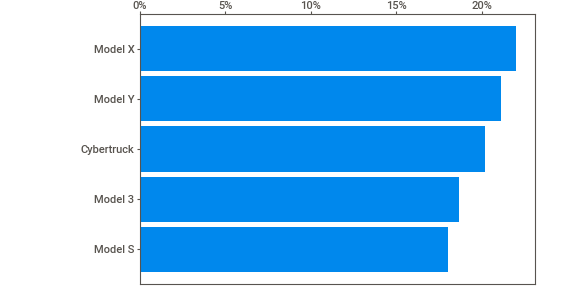
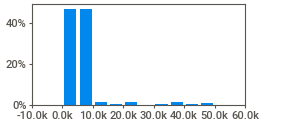
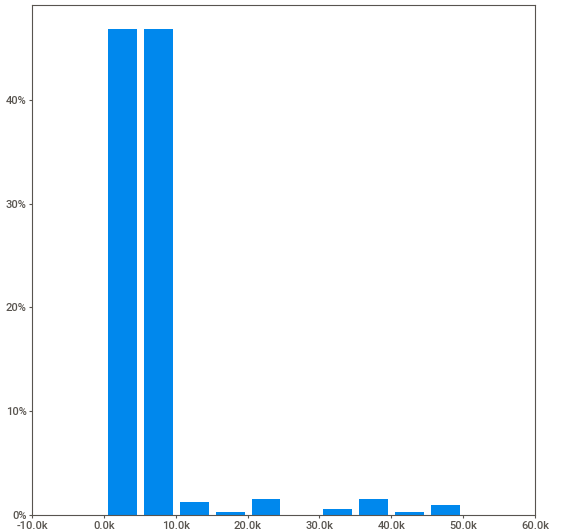
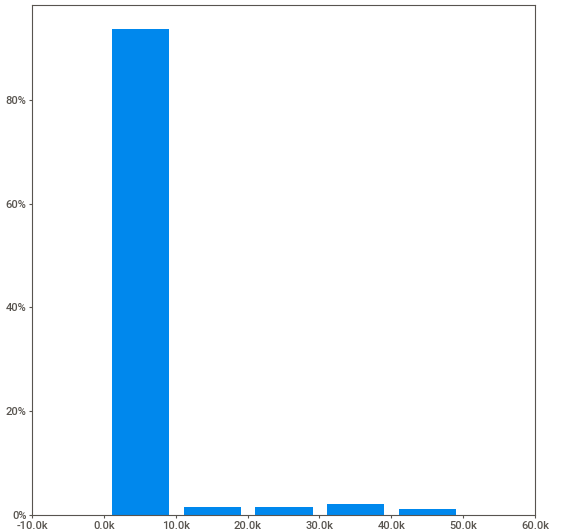
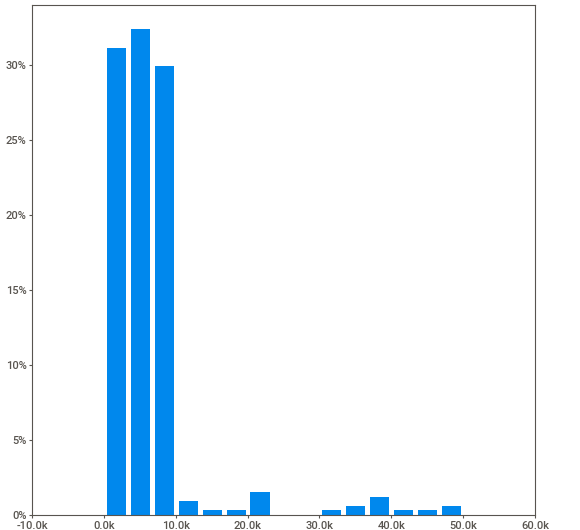
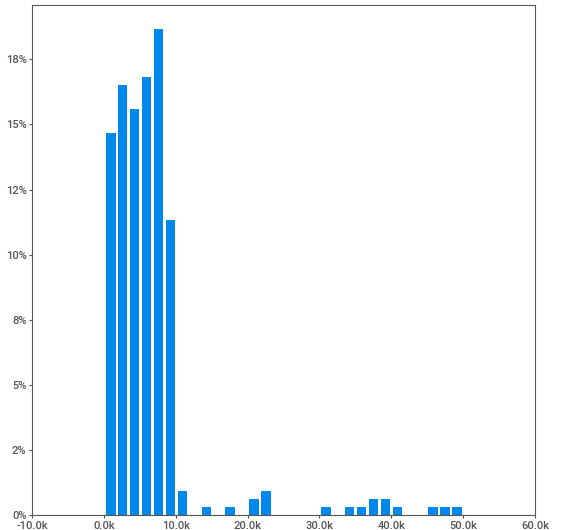
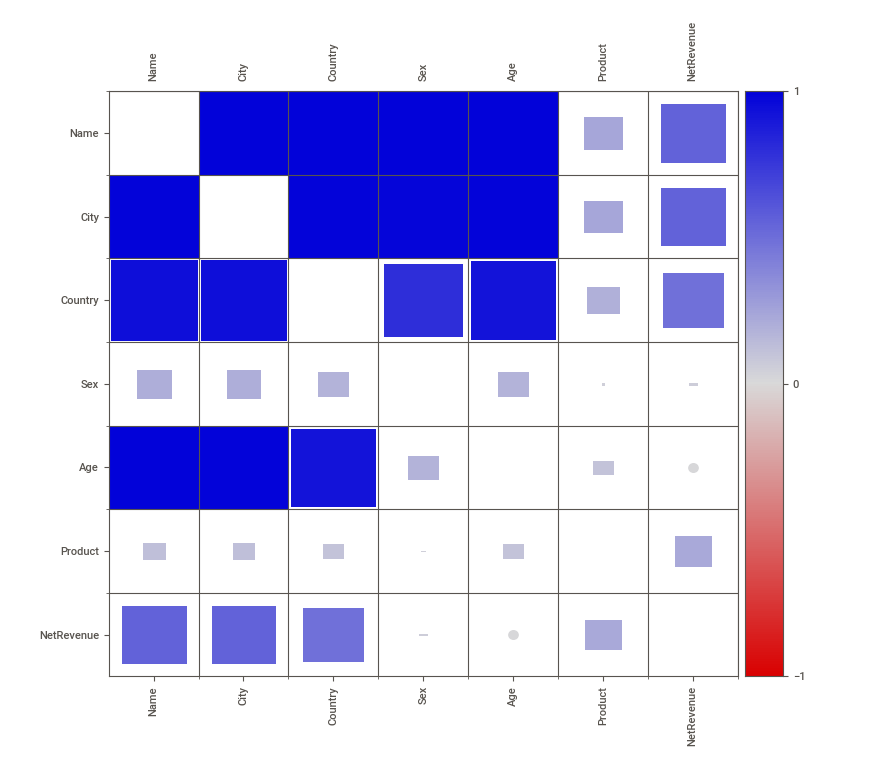
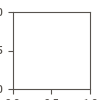

In [19]:
!pip install sweetviz
import sweetviz as sw

report = sw.analyze(df2)
report.show_html('sweetviz_report.html')

report.show_notebook()

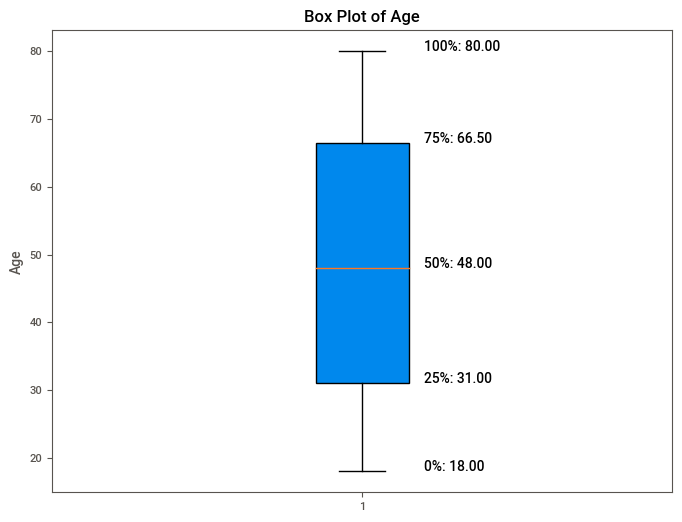

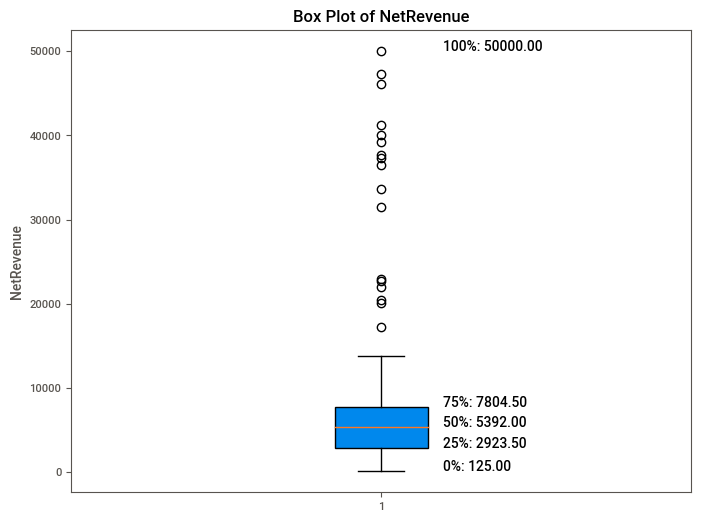

In [34]:
import matplotlib.pyplot as plt
import numpy as np

for column in df2.select_dtypes(include=np.number).columns:
  # Calculate percentiles
  percentiles = [0, 25, 50, 75, 100]
  percentile_values = np.percentile(df2[column], percentiles)

  # Create box plot
  plt.figure(figsize=(8, 6))
  plt.boxplot(df2[column], vert=True, patch_artist=True)
  plt.title(f'Box Plot of {column}')
  plt.ylabel(column)

  # Add percentile labels
  for i, percentile in enumerate(percentiles):
    plt.text(1.1, percentile_values[i], f'{percentile}%: {percentile_values[i]:.2f}')

  plt.show() # Indentation corrected to be inside the for loop to display plots individually